In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)  # For reproducibility

In [2]:
nodes = pd.DataFrame(columns=["node_id", "area", "lat", "lon", "exists", "comment"])
N = 10  # number of nodes
areas = ["A1", "A2"]

for i in range(N):
    lat = np.random.uniform(0, 10)
    lon = np.random.uniform(0, 10)
    area = areas[0] if lon <= 5 else areas[1]
    exists = np.random.choice([True, False])
    comment = "Acivte" if exists else ""
    nodes.loc[i] = [i, area, lat, lon, exists, comment]

In [3]:
import os


folder = os.getcwd()
print(folder)

data_folder = os.path.join(folder, "data")
print(data_folder)

if not os.path.exists(data_folder):

    os.makedirs(data_folder)

nodes.to_csv(os.path.join(data_folder, "nodes.csv"), index=False)

c:\Users\tinus\OneDrive\Dokumenter\0 Master\code\specialization_project\market_clearing_quick
c:\Users\tinus\OneDrive\Dokumenter\0 Master\code\specialization_project\market_clearing_quick\data


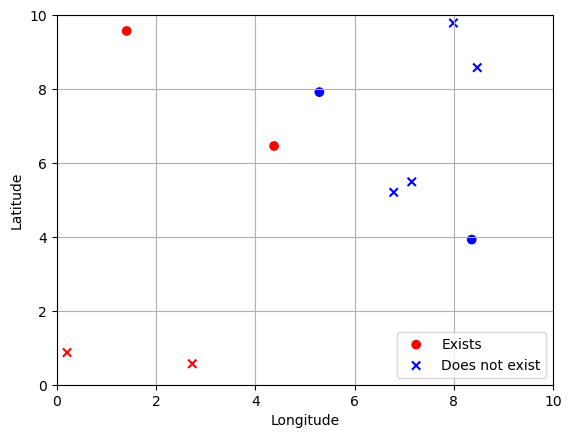

In [4]:
# Plot the nodes on a 2d plane with different colors for different areas and different shapes for existing and non-existing nodes
# Make sure to add a legend to the plot

plt.figure()
area_to_color = {"A1": "red", "A2": "blue"}
colormap = np.array([area_to_color[area] for area in nodes["area"]])
plt.scatter(
    nodes[nodes["exists"]]["lon"],
    nodes[nodes["exists"]]["lat"],
    c=colormap[nodes["exists"]],
    marker="o",
    label="Exists",
)
plt.scatter(
    nodes[~nodes["exists"]]["lon"],
    nodes[~nodes["exists"]]["lat"],
    c=colormap[~nodes["exists"]],
    marker="x",
    label="Does not exist",
)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np

# Generator parameters
num_generators = 8  # You can change this number as required
types = ["solar", "coal", "oil"]  # Possible types of generators
areas = ["A1", "A2"]  # Area identifiers

# Generate random data for generators

data = []
for _ in range(num_generators):
    generator_type = np.random.choice(types)
    node_id = np.random.choice(nodes["node_id"].values)
    area = np.random.choice(areas)

    if generator_type == "solar":
        pmax = np.random.uniform(50, 100)  # Smaller capacity for solar
        pmin = 0  # Renewable energy, minimum output is 0
        MC = np.random.uniform(5, 10)  # Solar has low marginal cost
        CO2 = 0  # No CO2 emissions for solar
    elif generator_type == "coal":
        pmax = np.random.uniform(200, 400)  # Coal power plant capacity
        pmin = pmax * 0.3  # Coal often has a high minimum generation level
        MC = np.random.uniform(20, 40)  # Higher marginal cost
        CO2 = np.random.uniform(0.8, 1.2)  # Tons of CO2 per MWh
    else:  # 'oil'
        pmax = np.random.uniform(100, 200)  # Oil generator capacity
        pmin = pmax * 0.4  # Oil also has a higher minimum output
        MC = np.random.uniform(50, 80)  # Oil has the highest marginal cost
        CO2 = np.random.uniform(0.6, 0.9)  # Tons of CO2 per MWh

    description = f"{generator_type.capitalize()} in {area}"

    # Append to data list
    data.append(
        {
            "desc": description,
            "type": generator_type,
            "pmax": pmax,
            "pmin": pmin,
            "MC": MC,
            "CO2": CO2,
            "node_id": node_id,  # Link to the node the generator is located at
        }
    )

# Create a DataFrame
df_generators = pd.DataFrame(data)

df_generators["generator_id"] = range(len(df_generators))  # Add an ID column
df_generators = df_generators[
    ["generator_id", "desc", "type", "pmax", "pmin", "MC", "CO2", "node_id"]
]

# Save to CSV
df_generators.to_csv(os.path.join(data_folder, "generators.csv"), index=False)

# Output the DataFrame for preview
df_generators

,generator_id,desc,type,pmax,pmin,MC,CO2,node_id
0,0,Solar in A2,solar,76.868661,0.000000,8.793078,0.000000,1
1,1,Oil in A2,oil,126.455561,50.582224,73.227011,0.736845,4
2,2,Oil in A1,oil,132.414101,52.965640,54.490246,0.666696,0
3,3,Coal in A2,coal,289.989998,86.996999,32.261269,1.160939,4
4,4,Coal in A2,coal,330.628007,99.188402,23.418192,0.943261,9
5,5,Solar in A2,solar,66.252361,0.000000,5.192127,0.000000,3
6,6,Solar in A1,solar,82.639516,0.000000,8.175294,0.000000,6
7,7,Solar in A1,solar,62.664580,0.000000,7.331554,0.000000,4


[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.0

[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.00233123
 0.02091591 0.11211478 0.26916404 0.48041605 0.73020323 1.        ]
[1.         1.26979677 1.51958395 1.73083596 1.88788522 1.97908409
 1.99766877 1.94226092 1.81696989 1.63108794 1.39840109 1.13616665
 0.86383335 0.60159891 0.36891206 0.18303011 0.05773908 0.0

,node_id,hour,demand
0,0,0,25.299691
1,0,1,35.728409
2,0,2,34.958830
3,0,3,34.754923
4,0,4,42.855402


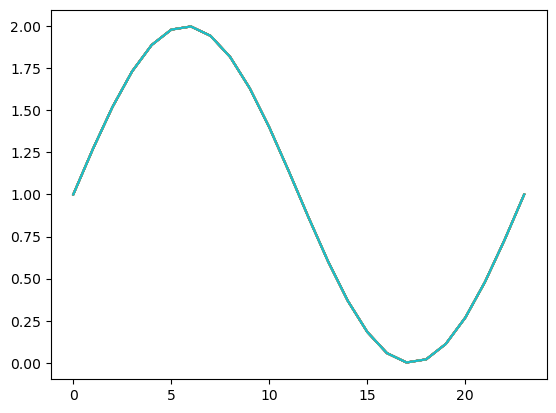

In [6]:
num_days = 2  # Number of days (can be extended for multiple days)
total_hours = num_days * 24  # Total hours (if generating multiple days of data)

# Create an empty list to store demand data
demand_data = []

# Generate hourly demand for each node
for node in nodes["node_id"]:
    base_demand = np.random.uniform(10, 30)  # Base demand level (MW) for each node
    hourly_variation = (
        np.sin(np.linspace(0, 2 * np.pi, 24)) + 1
    )  # Day-night demand pattern
    print(hourly_variation)
    plt.plot(hourly_variation)
    for hour in range(total_hours):
        # Hourly demand = base_demand + variation (scaled) + random noise
        demand = (
            base_demand
            + base_demand * hourly_variation[hour % 24]
            + np.random.normal(0, 5)
        )  # Adding noise
        demand_data.append(
            {"node_id": node, "hour": hour, "demand": max(0, demand)}
        )  # Ensure non-negative demand

# Convert to DataFrame
df_demand = pd.DataFrame(demand_data)

# Save to CSV
df_demand.to_csv(os.path.join(data_folder, "hourly_demand.csv"), index=False)

# Output the DataFrame for preview
df_demand.head()

In [7]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import networkx as nx

# Assuming 'nodes' DataFrame already exists with columns ['id', 'lat', 'lon']

# Parameters
num_nodes = len(nodes)
min_capacity = 100  # Minimum branch capacity (MW)
max_capacity = 500  # Maximum branch capacity (MW)
loss_slope = 0.01  # Loss factor slope (per unit of distance)

# Calculate the Euclidean distance between nodes (using lat, lon)
coordinates = nodes[["lat", "lon"]].values
dist_matrix = distance_matrix(coordinates, coordinates)

# Generate a Minimum Spanning Tree (MST) to ensure all nodes are connected
G = nx.Graph()

# Add edges based on the distance matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        G.add_edge(i, j, weight=dist_matrix[i, j])

# Get the MST to ensure connectivity
mst = nx.minimum_spanning_tree(G)

# Add some random additional edges to make the graph slightly denser
additional_edges = 5  # Number of extra connections
all_edges = list(G.edges)
np.random.shuffle(all_edges)

for edge in all_edges:
    if len(mst.edges) >= num_nodes - 1 + additional_edges:
        break
    mst.add_edge(*edge)

# Prepare the list to store branch data
branches = []

# For each edge in the MST or added edges, assign capacities and calculate loss
for u, v in mst.edges():
    distance = dist_matrix[u, v]
    capacity = np.random.uniform(min_capacity, max_capacity)  # Random capacity
    loss_factor = loss_slope * distance  # Linear function of distance

    branches.append(
        {
            "node_from": u,
            "node_to": v,
            "capacity": capacity,
            "distance": distance,
            "loss_factor": loss_factor,
        }
    )

# Convert to DataFrame
df_branches = pd.DataFrame(branches)
df_branches["branch_id"] = df_branches.index  # Add a unique ID for each branch
# Place the branch_id as the first column
df_branches = df_branches[
    ["branch_id", "node_from", "node_to", "capacity", "distance", "loss_factor"]
]
# Save to CSV
df_branches.to_csv(os.path.join(data_folder, "branches.csv"), index=False)

# Output the DataFrame for preview
df_branches.head()

,branch_id,node_from,node_to,capacity,distance,loss_factor
0,0,0,9,138.247953,0.460579,0.004606
1,1,0,5,448.441013,1.973809,0.019738
2,2,0,7,367.037322,7.051116,0.070511
3,3,1,8,177.087191,1.299033,0.012990
4,4,1,4,467.236780,3.251711,0.032517


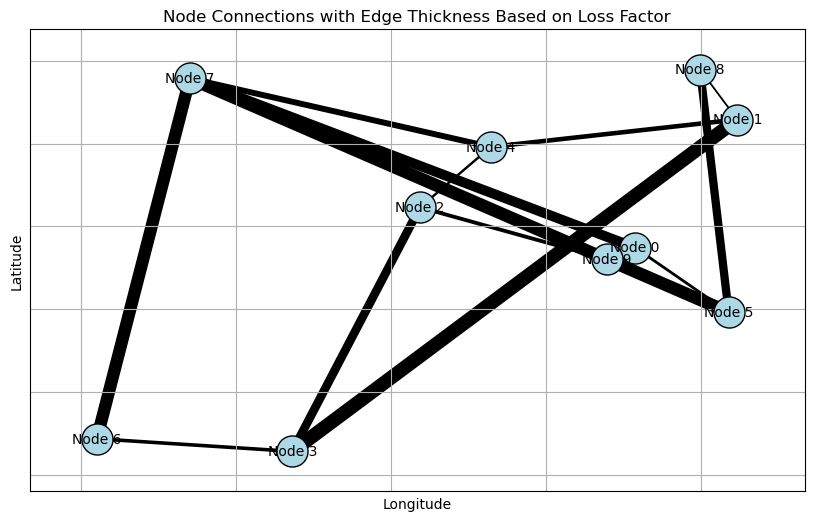

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming nodes and df_branches dataframes already exist
# Normalize the loss factors for plotting (so line thickness is relative)
df_branches["normalized_loss_factor"] = (
    df_branches["loss_factor"] / df_branches["loss_factor"].max()
)

# Create a new graph for plotting
G_plot = nx.Graph()

# Add nodes to the graph
for idx, row in nodes.iterrows():
    G_plot.add_node(row["node_id"], pos=(row["lon"], row["lat"]))

# Add edges to the graph with normalized loss factor for thickness
for _, row in df_branches.iterrows():
    G_plot.add_edge(
        row["node_from"], row["node_to"], weight=row["normalized_loss_factor"]
    )

# Get positions of nodes (for plotting)
pos = {
    node_id: (data["pos"][0], data["pos"][1])
    for node_id, data in G_plot.nodes(data=True)
}

# Plot the nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(
    G_plot, pos, node_size=500, node_color="lightblue", edgecolors="black"
)

# Plot the edges with varying thickness based on the normalized loss factor
edges = G_plot.edges(data=True)
nx.draw_networkx_edges(
    G_plot, pos, edgelist=edges, width=[row["weight"] * 10 for u, v, row in edges]
)

# Add labels to the nodes
nx.draw_networkx_labels(
    G_plot,
    pos,
    labels={node_id: f"Node {node_id}" for node_id in G_plot.nodes()},
    font_size=10,
)

# Title and display the plot
plt.title("Node Connections with Edge Thickness Based on Loss Factor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [9]:
batteries = {
    "battery_id": [],
    "node_id": [],
    "SOC_max": [],
    "SOC_min": [],
    "P_charge_max": [],
    "P_charge_min": [],
    "P_discharge_max": [],
    "P_discharge_min": [],
    "efficiency_charge": [],
    "efficiency_discharge": [],
}